In [34]:
import pandas as pd
from sklearn import datasets, ensemble
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
secundaria = pd.read_csv('secundaria_clear.csv')
a4 = pd.read_excel('AA4.xlsx')

In [36]:
secundaria = secundaria.groupby('MUNICIPIO CLAVE INEGI').mean()

In [37]:
X_train = a4[list(list(a4.columns[2:-1].values))]
X_train = X_train[:-1]

y_train = secundaria['DESERCION INTRACURRICULAR']

([<matplotlib.axis.XTick at 0x7f8c46b815d0>,
 [])

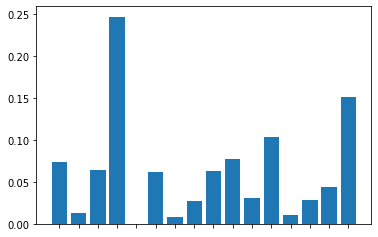

In [38]:
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)
plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), [])

In [39]:
[list(a4.columns[2:-1].values)]

[['ABUSO SEXUAL INFANTIL',
  'FEMINICIDIO',
  'HOMICIDIO DOLOSO',
  'LESIONES DOLOSAS',
  'ROBO A BANCOS',
  'ROBO A CARGA PESADA',
  'ROBO A CUENTAHABIENTES',
  'ROBO A INT DE VEHICULOS',
  'ROBO A NEGOCIO',
  'ROBO A PERSONA',
  'ROBO A VEHICULOS PARTICULARES',
  'ROBO CASA HABITACION',
  'ROBO DE AUTOPARTES',
  'ROBO DE MOTOCICLETA',
  'VIOLACION',
  'VIOLENCIA INTRAFAMILIAR']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-package

([<matplotlib.axis.XTick at 0x7f8c46fedcd0>,
 [])

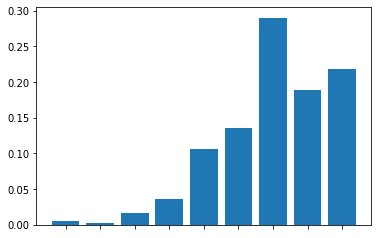

In [40]:
a6 = pd.read_csv('AA6_1_csv.csv')

for i in range(len(a6['15'])):
    try:
      a6['15'][i] = float(a6['15'][i].replace(",", ""))
    except:
      a6['15'][i] = a6['15'][i]

for i in range(len(a6['16'])):
    try:
      a6['16'][i] = float(a6['16'][i].replace(",", ""))
    except:
      a6['16'][i] = a6['16'][i]

for i in range(len(a6['17'])):
    try:
      a6['17'][i] = float(a6['17'][i].replace(",", ""))
    except:
      a6['17'][i] = a6['17'][i]

for i in range(len(a6['18'])):
    try:
      a6['18'][i] = float(a6['18'][i].replace(",", ""))
    except:
      a6['18'][i] = a6['18'][i]

for i in range(len(a6['19'])):
    try:
      a6['19'][i] = float(a6['19'][i].replace(",", ""))
    except:
      a6['19'][i] = a6['19'][i]

a6 = a6.fillna(0)

X_train2 = a6[list(list(a6.columns[6:].values))]
y_train2 = secundaria['DESERCION INTRACURRICULAR']
X_train2 = X_train2[1:-3]

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train2, y_train2)
plt.bar(range(X_train2.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train2.shape[1]), [])

In [41]:
list(a6.columns[6:].values)

['11', '12', '13', '14', '15', '16', '17', '18', '19']

([<matplotlib.axis.XTick at 0x7f8c46da9b90>,
 [])

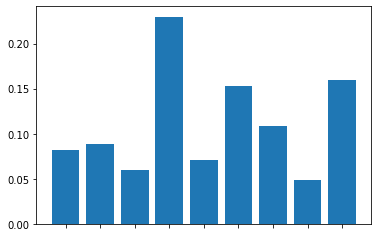

In [42]:
a5 = pd.read_excel('AA5.xlsx')
X_train3 = a5[list(list(a5.columns[3:-4].values))]
y_train3 = secundaria['DESERCION INTRACURRICULAR']
X_train3 = X_train3[1:-2]
X_train3

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train3, y_train3)
plt.bar(range(X_train3.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train3.shape[1]), [])

In [43]:
list(a5.columns[3:-4].values)

['Porcentaje de población de 15 años o más analfabeta ',
 'Porcentaje de población de 15 años o más sin primaria completa ',
 'Porcentaje de ocupantes en viviendas sin drenaje ni  excusado',
 'Porcentaje de ocupantes en viviendas sin energía eléctrica',
 'Porcentaje de ocupantes en viviendas sin agua entubada',
 'Porcentaje de viviendas con algún nivel de hacinamiento',
 'Porcentaje de ocupantes en viviendas con piso de tierra',
 'Porcentaje de población en localidades con menos de 5 000 habitantes',
 'Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos']

([<matplotlib.axis.XTick at 0x7f8c46bcf7d0>,
 [])

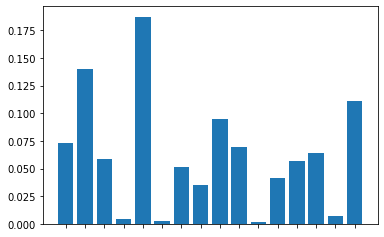

In [46]:
a62 = pd.read_excel('AA6_2.xls')
X_train4 = a62[list(list(a62.columns[2:].values))]
y_train4 = secundaria['DESERCION INTRACURRICULAR'][:-10]
X_train4 = X_train4[1:]

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train4, y_train4)
plt.bar(range(X_train4.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train4.shape[1]), [])

In [45]:
list(a62.columns[2:].values)

['poblacií_n_de_3_aí±os_y_míçs_que_habla_alguna_lengua_indí_gena',
 'p_masculina_3_aí±os_y_míçs_habla_lengua_indí_gena',
 'p_femenina_3_aí±os_míçs_habla_lengua_indí_gena',
 'p_3_aí±os_y_míçs_habla_lengua_indí_gena_no_habla_espaí±ol',
 'p_masculina_3_aí±os_míçs_habla_lengua_indí_gena_no_espaí±ol',
 'p_femenina_3_aí±os_y_míçs_habla_lengua_indí_gena_no_espaí±ol',
 'p_3_aí±os_y_míçs_habla_lengua_indí_gena_habla_espaí±ol',
 'p_masculina_3_aí±os_y_míçs_habla_lengua_indí_gena_habla_espaí±o',
 'p_femenina_3_aí±os_y_míçs_habla_lengua_indí_gena_habla_espaí±ol',
 'poblacií_n_5_aí±os_y_míçs_habla_lengua_indí_gena',
 'p_5_aí±os_míçs_habla_lengua_indí_gena_no_habla_espaí±ol',
 'p_5_aí±os_y_míçs_habla_lengua_indí_gena_habla_espaí±ol',
 'poblacií_n_en_hogares_censales_indí_genas',
 'poblacií_n_de_5_aí±os_y_míçs_que_habla_lengua_indí_gena',
 'p_5_aí±os_y_míçs_habla_lengua_indí_gena_y_espaí±ol',
 'p_5_aí±os_y_míçs_habla_lengua_indí_gena_y_habla_espaí±ol']

In [47]:
pip install "dask[complete]"

Epoch 1/400
3/3 [==============================] - 1s 123ms/step - loss: 0.2838 - mse: 0.2838 - val_loss: 0.3181 - val_mse: 0.3181
Epoch 2/400
3/3 [==============================] - 0s 22ms/step - loss: 0.2657 - mse: 0.2657 - val_loss: 0.3114 - val_mse: 0.3114
Epoch 3/400
3/3 [==============================] - 0s 20ms/step - loss: 0.2651 - mse: 0.2651 - val_loss: 0.3048 - val_mse: 0.3048
Epoch 4/400
3/3 [==============================] - 0s 22ms/step - loss: 0.2444 - mse: 0.2444 - val_loss: 0.2981 - val_mse: 0.2981
Epoch 5/400
3/3 [==============================] - 0s 22ms/step - loss: 0.2347 - mse: 0.2347 - val_loss: 0.2916 - val_mse: 0.2916
Epoch 6/400
3/3 [==============================] - 0s 21ms/step - loss: 0.2476 - mse: 0.2476 - val_loss: 0.2850 - val_mse: 0.2850
Epoch 7/400
3/3 [==============================] - 0s 24ms/step - loss: 0.2300 - mse: 0.2300 - val_loss: 0.2783 - val_mse: 0.2783
Epoch 8/400
3/3 [==============================] - 0s 23ms/step - loss: 0.2406 - mse: 0.2

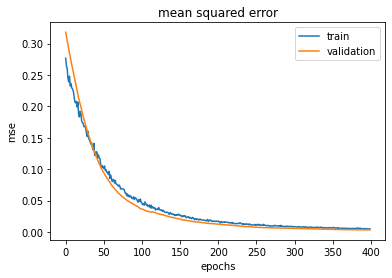

In [48]:
import dask.dataframe as dd
inp = X_train[['LESIONES DOLOSAS', 'VIOLENCIA INTRAFAMILIAR']]
inp2 = X_train3[['Porcentaje de ocupantes en viviendas sin energía eléctrica','Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos']].set_index([pd.Index([x for x in range(125)])])
inp3 = X_train4[['p_masculina_3_aí±os_míçs_habla_lengua_indí_gena_no_espaí±ol','poblacií_n_de_3_aí±os_y_míçs_que_habla_alguna_lengua_indí_gena']].set_index([pd.Index([x for x in range(115)])])

inp4 = dd.merge(inp, inp2, left_index=True, right_index=True)
inp4 = inp4[:-10]
inp5 = dd.merge(inp4, inp3, left_index=True, right_index=True)

y_train = secundaria['DESERCION INTRACURRICULAR'][:-10]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten, BatchNormalization
model = Sequential([
 Flatten(),
  Dense(128, activation = 'sigmoid'),
  BatchNormalization(),
  Dense(256, activation = 'sigmoid'),
  BatchNormalization(),
  Dropout(.2), 
  Dense(128, activation = 'sigmoid'),
  BatchNormalization(),
  Dropout(.2),
  Dense(64, activation = 'sigmoid'),
  BatchNormalization(),
  Dense(32, activation = 'sigmoid'),
  BatchNormalization(),
  Dense(1, activation = 'sigmoid')
])
opt = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9) 

model.compile(optimizer = 'sgd',
 loss = 'mean_squared_error',
 metrics = ['mse'])

history = model.fit(inp5, y_train, epochs = 400, validation_split = 0.2)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'] , loc = 'upper right')
plt.show()
